# Pypi/conda download statistics of napari plugins
This notebook visualizes download statistics of napari plugins downloaded from pypi and conda. It uses the APIs of the [napari hub](https://www.napari-hub.org/) and [pypistats](https://pypistats.org/) and [condastats](https://condastats.readthedocs.io/) (big thanks to the data providers!).

Before over-interpreting the presented data, please be aware of:
* the number of downloads is typically higher than the number of users,
* plugins that are dependencies of other plugins appear downloaded more often,
* plugins downloaded via conda and pypi may be counted differently,
* plugins that serve as python libraries also for other purposes may be overestimated in the napari-plugin context,
* plugins downloaded via automated test suites may be counted as well and
* [gamification](https://en.wikipedia.org/wiki/Gamification).

In [1]:
# conda install condastats 
# pip install pypistats

In [2]:
import pandas as pd
import urllib, json
import matplotlib.pyplot as plt
import time
import numpy as np

from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source
from pypistats import overall as overall_pypi

month = '2023-03'
start_date = '2023-03-01'
end_date = '2023-03-31'

In [3]:
# check which months exist on conda
p = pkg_python('devbio-napari', monthly=True)
p

pkg_name       time     pkg_python
devbio-napari  2022-04                 304
               2022-05                 391
               2022-06                 842
               2022-07                1994
               2022-08                 423
               2022-09                1583
               2022-10                 988
               2022-11                 665
               2022-12                 436
               2023-01                 271
               2023-02                 272
               2023-03                 258
               2023-04                 715
               2023-05                 257
               2023-06                 304
Name: counts, dtype: int64

In [4]:
# check which months exist on conda
p = pkg_python('napari', monthly=True)
p

pkg_name  time     pkg_python
napari    2020-02                  39
          2020-03                 150
          2020-04                 235
          2020-05                 788
          2020-06                1012
          2020-07                 797
          2020-08                 499
          2020-09                 759
          2020-10                1346
          2020-11                 725
          2020-12                 535
          2021-01                 482
          2021-02                1036
          2021-03                2191
          2021-04                1830
          2021-05                1184
          2021-06                1528
          2021-07                1773
          2021-08                2442
          2021-09                1734
          2021-10                1746
          2021-11                1273
          2021-12                1260
          2022-01                1717
          2022-02                2201
          2022-03   

In [5]:
def get_all_plugin_data():
    url = 'https://api.napari-hub.org/plugins'

    json_url = urllib.request.urlopen(url) 
    data = json.loads(json_url.read()) 
    #print (data)
    return data

def get_plugin_index():
    data = get_all_plugin_data()
    return list(data.keys())

all_plugins = get_plugin_index()

df = pd.DataFrame({'plugin':all_plugins})

In [6]:
def add_condastats(df):
    conda_downloads = []
    for name in df['plugin']:
        name = name.lower()
        print(name)
        try:
            p = pkg_python(name, month=month)
            num_downloads = p[0]
        except:
            print("Error")
            num_downloads = np.nan
        conda_downloads.append(num_downloads)

    df['conda_downloads'] = conda_downloads

add_condastats(df)

image-composer
image-part-selecter
label-creator
layer-data-replace
msi-explorer
Error
offset-subtraction
partseg
partseg-smfish
partial-aligner
platymatch
redlionfish
world2data
acquifer-napari
Error
affinder
allencell-ml-segmenter
Error
anchor-droplet-chip
Error
arcos-gui
avidaq
bbii-decon
beetlesafari
bfio
Error
blik
brainglobe-napari-io
brainreg-napari
Error
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
Error
eats-worm
Error
elastix-napari
Error
empanada-napari
Error
epitools
Error
faser
Error
grabber-ift
guanine-crystal-analysis
hesperos
iacs-ipac-reader
ilastik-napari
Error
imaxt-multiscale-plugin
Error
in-silico-fate-mapping
Error
koopa-viz
mikro-napari
Error
misic-napari
morphometrics
morphometrics-engine
Error
morphospaces
Error
multireg
Error
napari-3d-ortho-viewer
napari-deepspot
napari-ids
Error
napari-ip-workflow
napari-ism
napari-j
napari-lf
Error
napari-philow
napari-picasso
napari-sam4is
Error
napari-accelerated-pixel-and-obj

In [7]:
df

,plugin,conda_downloads
0,Image-Composer,10.0
1,Image-Part-Selecter,10.0
2,Label-Creator,10.0
3,Layer-Data-Replace,17.0
4,MSI-Explorer,NaN
5,Offset-Subtraction,12.0
6,PartSeg,252.0
7,PartSeg-smfish,30.0
8,Partial-Aligner,14.0
9,PlatyMatch,114.0


In [8]:
def add_pypistats(df):
    pypi_downloads = []
    for name in df['plugin']:
        print(name)
        try:
            time.sleep(5)
            o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)
            without_mirrors = o[o['category']  == 'without_mirrors']
            num_downloads = without_mirrors['downloads'].sum()
        except:
            print("Error")
            num_downloads = np.nan
        pypi_downloads.append(num_downloads)

    df['pypi_downloads'] = pypi_downloads

add_pypistats(df)

Image-Composer
Image-Part-Selecter
Label-Creator
Layer-Data-Replace
MSI-Explorer
Error
Offset-Subtraction
PartSeg
PartSeg-smfish
Partial-Aligner
PlatyMatch
RedLionfish
World2Data
acquifer-napari
Error
affinder
allencell-ml-segmenter
Error
anchor-droplet-chip


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-13), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


arcos-gui
avidaq
bbii-decon
beetlesafari
bfio
blik
brainglobe-napari-io
brainreg-napari
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
eats-worm
Error
elastix-napari
empanada-napari
epitools
Error
faser
grabber-ift
guanine-crystal-analysis
hesperos
iacs-ipac-reader
ilastik-napari
imaxt-multiscale-plugin
in-silico-fate-mapping
koopa-viz
mikro-napari
misic-napari
morphometrics
morphometrics-engine
morphospaces
multireg
Error
napari-3d-ortho-viewer
napari-DeepSpot
napari-IDS
napari-IP-workflow
napari-ISM
napari-J
napari-LF
napari-PHILOW
napari-PICASSO
napari-SAM4IS
Error
napari-accelerated-pixel-and-object-classification
napari-affinities
napari-aicsimageio
napari-aideveloper
napari-allencell-annotator
napari-allencell-segmenter
napari-amdtrk
Error
napari-animated-gif-io
napari-animation
napari-annotate
napari-annotator
napari-annotatorj
napari-aphid
napari-apple
napari-apr-viewer
napari-arboretum
napari-assistant
napari-assistant-plugin-generat

C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-24), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-bigfish
Error
napari-bigwarp
napari-bil-data-viewer
napari-bio-sample-data
napari-bioformats
napari-bioimageio
napari-bleach-correct
napari-blender-bridge
Error
napari-blob-detection
napari-blossom
napari-boids
napari-boxmanager
napari-brainbow-diagnose
napari-brainways
Error
napari-brightness-contrast
napari-brushsettings
napari-bud-cell-segmenter
napari-buds
napari-calibration
napari-ccp4map
napari-cell-centroid-annotator


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-23), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-cellseg3d
napari-chatgpt
Error
napari-checkerboard
napari-clemreg
napari-clusters-plotter
napari-compressed-labels-io
napari-conidie
napari-console
napari-cookiecut
napari-correct-drift
Error
napari-crop
napari-cryofibsem-monitor
napari-cupy-image-processing
napari-curtain
napari-czann-segment
napari-czifile2
napari-data-preview
napari-deepfinder
napari-deeplabcut
napari-deepmeta
napari-denoiseg
napari-dexp
napari-dv
napari-dvid
napari-dzi-zarr
napari-ehooke


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-02), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-elementary-numpy-operations
napari-em-reader
napari-error-reporter
napari-feature-classifier
napari-features
napari-features-selector


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-28), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-figure
Error
napari-filament-annotator
napari-filaments
napari-file-watcher
napari-folder-browser
napari-gemspa
Error
napari-generic-SIMulator
napari-geojson
napari-geoscience-viewer
Error
napari-graph
Error
napari-griottes


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-09), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-gruvbox
napari-hdf5-labels-io
napari-hello
Error
napari-help
napari-hierarchical
napari-hough-circle-detector
Error
napari-image-stacker
napari-imagej
Error
napari-imaris-loader
napari-imc
napari-imsmicrolink
napari-indices
Error
napari-input-visualizer
napari-itk-io
napari-kics
napari-label-interpolator
napari-labelimg4classification
napari-labeling
napari-labelling-assistant
napari-labelprop
Error
napari-labels-overlap
napari-laptrack
Error
napari-large-image-importer
napari-lattice
napari-layer-details-display
napari-layer-table
napari-lazy-openslide
napari-listener


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-21), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-live-flim
napari-live-recording
napari-locpix
napari-macrokit
napari-manual-transforms
napari-mat-file-reader
napari-mat-images
napari-math
napari-matplotlib
napari-mclabel
Error
napari-medical-image-formats
napari-merge-stardist-masks
napari-meshio


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-07), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-metroid
napari-micromanager
napari-microscope
napari-mm3
napari-molecule-reader
napari-mouse-controls
napari-mrcfile-handler
napari-mrcfile-reader
napari-mri
napari-multitask
napari-mzarr
Error
napari-n2v
napari-nD-annotator
napari-nanopyx
Error
napari-napari
Error
napari-nasa-samples
napari-nd-cropper
napari-nd2-folder-viewer
napari-ndev
napari-ndtiffs
napari-nibabel
napari-nifti
Error
napari-nikon-nd2
napari-nlm
napari-nucleaizer
napari-nyxus
Error
napari-obj
Error
napari-omaas
napari-ome-zarr
napari-omero
napari-organoid-counter
napari-owncloud
napari-patchcreator
napari-pdf-reader
napari-pdr-reader
napari-pixel-correction
napari-plot
napari-plot-profile
napari-plugin-search
napari-pointslayer-projection
napari-power-spectrum
napari-power-widgets
napari-pram
napari-process-points-and-surfaces
napari-proofread-brainbow
napari-properties-plotter
napari-properties-viewer
napari-psf-analysis
napari-psf-simulator
napari-pssr
napari-pyclesperanto-assistant
napari-pymeshlab
napari-p

C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-06), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-tomodl


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-15), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-tomoslice
napari-tomotwin
napari-tracing
Error
napari-tracks-reader
napari-trait2d
napari-turing
napari-tyssue
napari-ui-tracer


C:\Users\haase\AppData\Local\Temp\ipykernel_15620\2625326076.py:7: UserWarning: Requested start date (2023-03-01) is before earliest available data (2023-03-14), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-umap
napari-unicell
napari-validate-random-label-predictions
napari-vedo-bridge
Error
napari-vesicles-segmentation
napari-video-cvdask
napari-vodex
napari-workflow-inspector
napari-workflow-optimizer
napari-workshop-browser
Error
napari-wsi
napari-wsireg
napari-yapic-prediction
napari-yolov5
napari-zelda
napari-zulip
Error
napari_video
natari
nfinder
okapi-em
organelle-segmenter-plugin
Error
palmari
platelet-unet-watershed
psfmodels
pycudadecon
recOrder-napari
skan
skeleton-finder
smo
snouty-viewer
stardist-napari
the-segmentation-game
tootapari
Error
vessel-express-napari
vollseg-napari
vollseg-napari-mtrack
vollseg-napari-trackmate
waver
workshop-demo
yt-napari
zarpaint
zarr-tools


In [9]:
# df

In [10]:
df.to_csv("stats_" + month + ".csv")

In [11]:
def remove_nans_and_shipped_with_napari_plugins(df):
    # remove plugins that are part of the napari distribution
    remove_plugins = ["napari-console", "napari-svg"]
    df = df[[x not in remove_plugins for x in df['plugin']]]

    # remove nans
    df = df.dropna()
    
    return df

df = remove_nans_and_shipped_with_napari_plugins(df)

In [12]:
df = df.sort_values('conda_downloads', ascending=False)

In [13]:
df

,plugin,conda_downloads,pypi_downloads
28,devbio-napari,258.0,225.0
6,PartSeg,252.0,358.0
279,napari-time-slicer,244.0,1177.0
75,napari-assistant,172.0,1150.0
10,RedLionfish,172.0,247.0
315,psfmodels,169.0,235.0
257,napari-skimage-regionprops,169.0,2481.0
318,skan,162.0,11882.0
93,napari-brightness-contrast,144.0,137.0
59,napari-accelerated-pixel-and-object-classifica...,144.0,360.0


In [14]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

## condastats

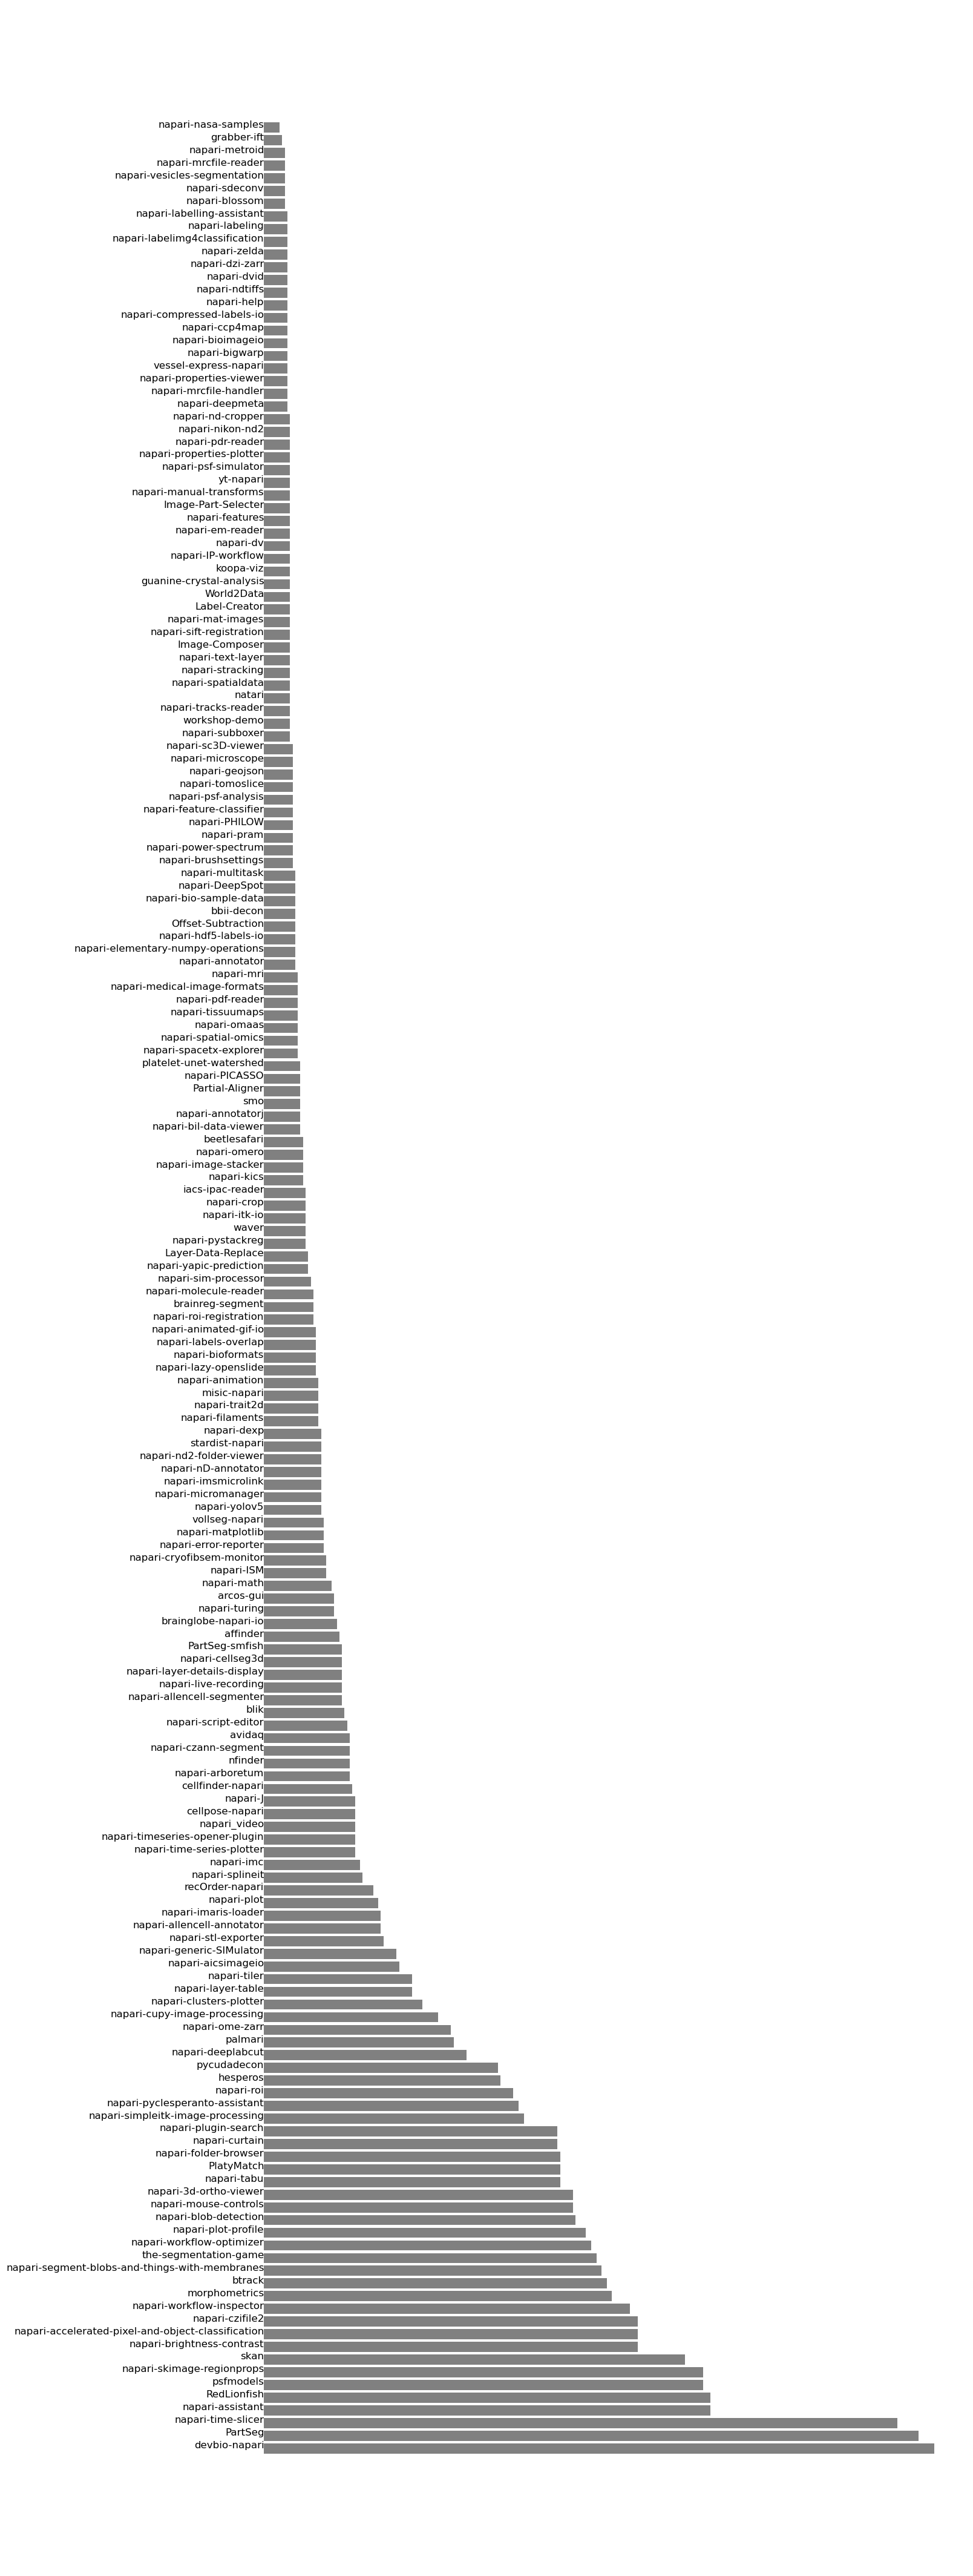

In [15]:
def plot_data(df, column='conda_downloads', width=15,height=55):
    f, ax = plt.subplots(1,1,figsize=(width,height))
    # ax = plt.subplot(111, fig_size=(15, 15))
    #df[column].plot(ax=ax, kind='barh', title='ranking')
    ax.axis('off')
    for i, x in enumerate(df['plugin']):
        plt.barh(i, df[column][i], color = 'grey')
        ax.text(0, i, x, ha='right', fontsize='large')
        
plot_data(df)

## condastats vs. pypistats

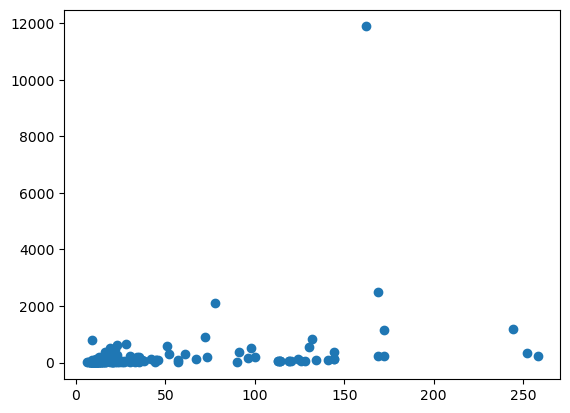

In [16]:
plt.scatter(df['conda_downloads'], df['pypi_downloads'])

## pypistats

In [17]:
# reload the data because we removed entries with NaNs in the pypi column earlier
df = pd.read_csv("stats_" + month + ".csv")
df = df[["plugin", "pypi_downloads"]]

df = remove_nans_and_shipped_with_napari_plugins(df)

In [18]:
df = df.sort_values('pypi_downloads', ascending=False)
df

,plugin,pypi_downloads
318,skan,11882.0
257,napari-skimage-regionprops,2481.0
118,napari-deeplabcut,2100.0
20,bfio,1236.0
279,napari-time-slicer,1177.0
75,napari-assistant,1150.0
212,napari-ome-zarr,896.0
25,btrack,822.0
203,napari-ndtiffs,788.0
333,zarr-tools,782.0


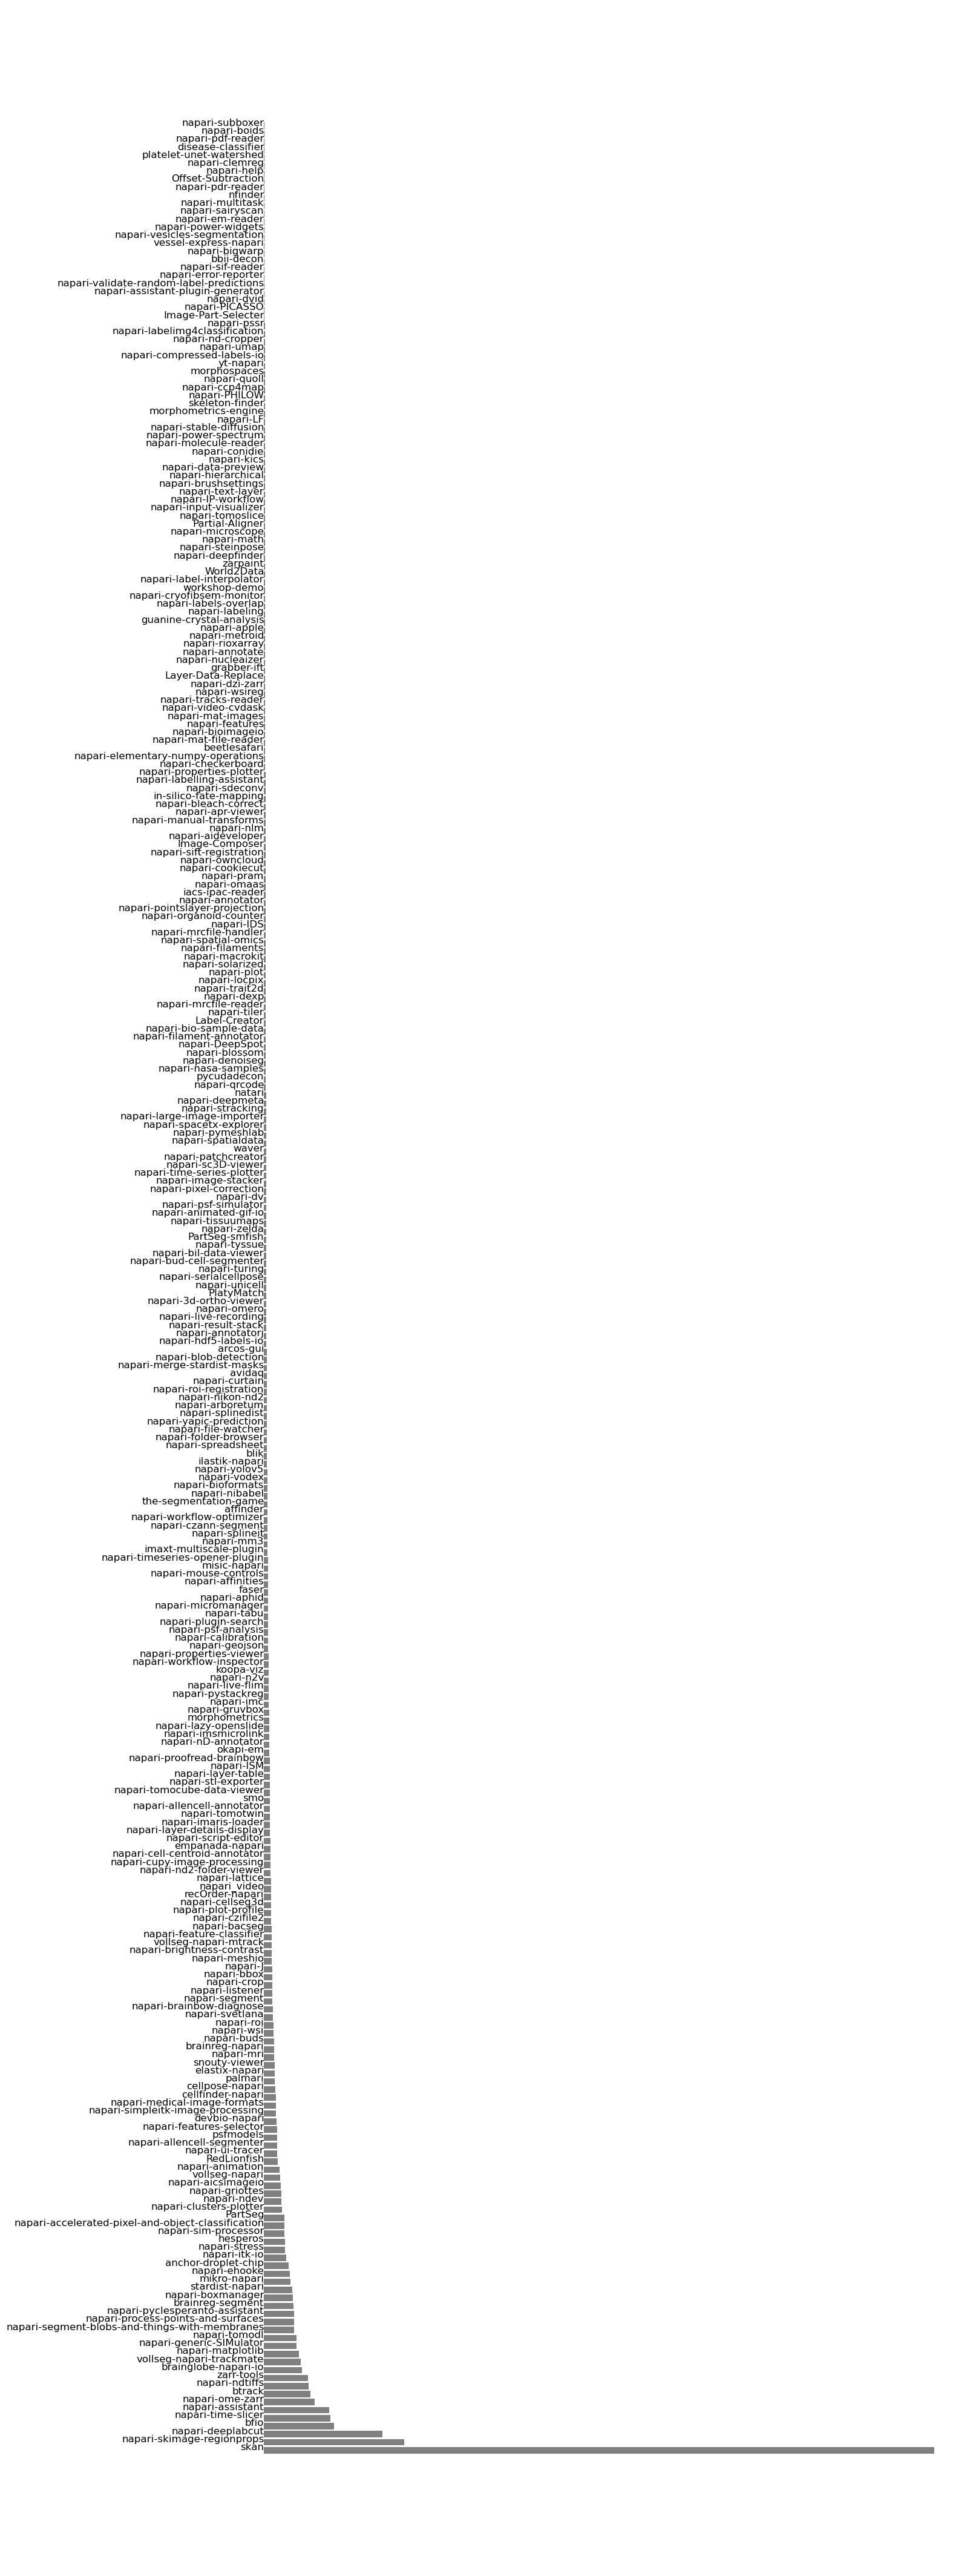

In [19]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

plot_data(df, column='pypi_downloads')